# Analítica de datos
# Examen parcial 1
# 2019-02

Descripción 

El dataset que va a analizar contiene las estadísticas de rendimiento de jugadores de baseball en USA en 1986, así como los salarios de los mismos. Se dispone del diccionario de datos siguiente: 
- Player: Nombre del jugador 
- Atbat: número de veces que se ha presentado para batear en 1986 
- Hits: número de veces que ha conectado un bateo sencillo y llegado a base en 1986 
- HmRun: número de home runs en 1986 
- Runs: número de carreras anotadas en 1986 
- RBI: número de carreras impulsadas en 1986 
- Walks: número de veces que ha pasado por bolas en 1986 
- Years: número de años como profesional 
- CAtbat: número de veces que se ha presentado para batear en su carrera 
- CHits: número de veces que ha conectado un bateo sencillo y llegado a base en su carrera 
- CHmRun: número de home runs en su carrera 
- CRuns: número de carreras anotadas en su carrera 
- CRBI: número de carreras impulsadas en su carrera 
- CWalks: número de veces que ha pasado en su carrera 
- League: categoría de la liga en la que jugaba en 1986 
- Division: división en la que jugaba en 1986 
- PutOuts: número de ponchadas que ha generado defensivamente en 1986 
- Assists: número de veces que ha ayudado a ponchar a un jugador contrario indirectamente en 1986 
- Errors: número de errores en 1986 
- NewLeague: categoría de la liga en la que jugaba el día de apertura de la temporada 1987 
- Salary: salario anual (en miles de dólares) el día de apertura de la temporada 1987 

No se conocen los salarios de algunos de los jugadores (aparecen con NA). La idea es poder predecirlos a partir de un modelo basado en los demás campos. 

Puntos a desarrollar 
1. Limpieza y EDA: Verifiquen si hay problemas de calidad de datos (diferentes a los NAs del campo Salary).  Se espera una primera sección de evaluación de la calidad de los datos y de entendimiento de la relación entre las variables predictivas y la variable objetivo (OJO! Solo poner gráficos y análisis de las relaciones importantes, menos es mas!) 


2. Modelos predictivos: Entrenen modelos predictivos (al menos 3 familias de modelos) que permitan estimar el salario de los jugadores de baseball a partir de los valores de las demás variables (de los jugadores que tienen valor de Salary). Escoja el mejor modelo, buscando sus parámetros óptimos.Se espera una sección donde se establezca el protocolo de evaluación y los procesos de entrenamiento y evaluación de los modelos. 


3. Cambio de representación del dataset: Considerando todas las variables (menos Salary), realice un análisis de componentes principales (PCA), escogiendo el número de componentes necesarios para conservar el 95% de la representación original. 


4. Caracterización de los jugadores: Con los datos en su nueva representación de PCs, realice una segmentación, estableciendo el mejor número de clusters entre 3 y 5. Caracterice los clusters con respecto a las variables originales (incluyendo Salary). 

# 1. Entendimiento de los datos, limpieza y EDA

In [6]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression # modelos lineales
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score #protocolo de evaluación
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn import naive_bayes, datasets, metrics, linear_model
from sklearn import preprocessing
from sklearn import neighbors, datasets, metrics
import seaborn as sns
import statsmodels.api as sm

### A continuación procedemos con la carga de datos

In [7]:
data = pd.read_csv("Baseball.csv")
data.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,A,NaN
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,N,475.0
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,A,480.0
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,N,500.0
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,N,91.5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Player       322 non-null object
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
NewLeague    322 non-null object
Salary       263 non-null float64
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


#### Como se puede observar al momento de arrojar información correspondiente acerca de las variables del dataset, se puede ver que hay 322 registros, a excepción de la variable Salary conforme decía en el enunciado. Además, los tipos de la variables conrresponden con su descripción. 

In [9]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player,322,322,Garth Iorg,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AtBat,322,NaN,NaN,NaN,380.929,153.405,16,255.25,379.5,512,687
Hits,322,NaN,NaN,NaN,101.025,46.4547,1,64,96,137,238
HmRun,322,NaN,NaN,NaN,10.7702,8.70904,0,4,8,16,40
Runs,322,NaN,NaN,NaN,50.9099,26.0241,0,30.25,48,69,130
RBI,322,NaN,NaN,NaN,48.028,26.1669,0,28,44,64.75,121
Walks,322,NaN,NaN,NaN,38.7422,21.6393,0,22,35,53,105
Years,322,NaN,NaN,NaN,7.4441,4.92609,1,4,6,11,24
CAtBat,322,NaN,NaN,NaN,2648.68,2324.21,19,816.75,1928,3924.25,14053
CHits,322,NaN,NaN,NaN,717.571,654.473,4,209,508,1059.25,4256


### Procedemos a anlizar los valores atípicos y excepcionales por variable que se  pueden encontrar en el dataset

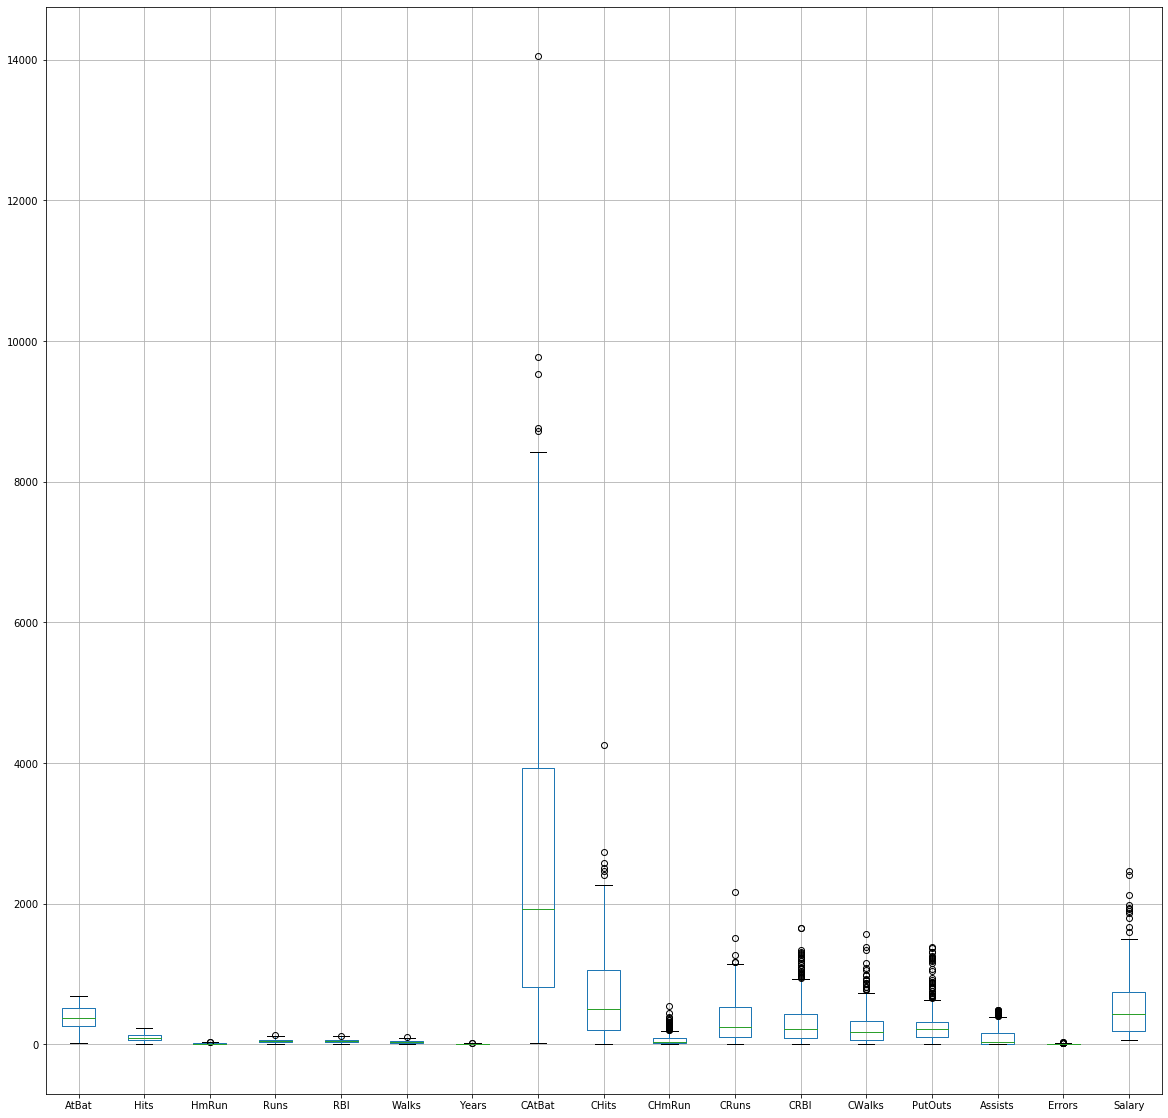

In [10]:
plt.figure(figsize=(20,20))
data.boxplot()

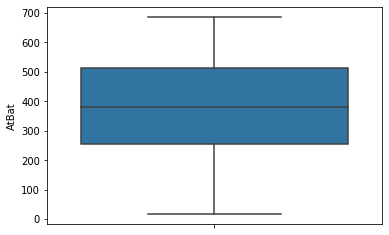

In [11]:
sns.boxplot(data=data,y="AtBat")

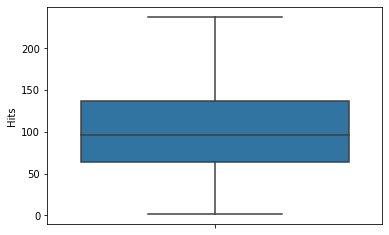

In [12]:
sns.boxplot(data=data,y="Hits")

# En los siguientes boxplot se puede observar  algunos datos atípicos, los cuales serán tratados como sigue:

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

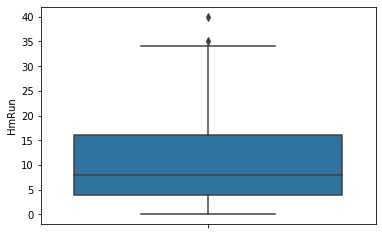

In [13]:
sns.boxplot(data=data,y="HmRun")

In [14]:
values = data.iloc[data['HmRun'].argsort()[-2:]]
values

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
80,Dave Kingman,561,118,35,70,94,33,16,6677,1575,...,901,1210,608,A,W,463,32,8,A,NaN
136,Jesse Barfield,589,170,40,107,108,69,6,2325,634,...,371,376,238,A,E,368,20,3,A,1237.5


### Se encontró 2 datos atípicos en la variable HmRun, los cuales serán cambiados por el promedio.

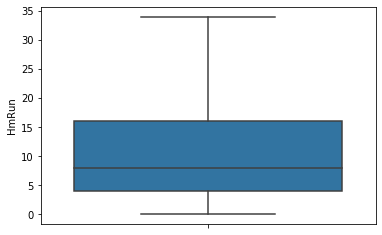

In [15]:
data.loc[data.HmRun>34,'HmRun']= np.nan
data.loc[data.HmRun.isna(),'HmRun'] = np.mean(data.HmRun)
sns.boxplot(data=data,y="HmRun")


//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

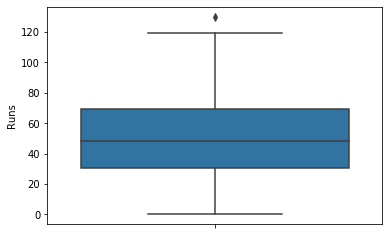

In [16]:
sns.boxplot(data=data,y="Runs")

In [17]:
values = data.iloc[data['Runs'].argsort()[-1:]]
values

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
248,Rickey Henderson,608,160,28.0,130,74,89,8,4071,1182,...,862,417,708,A,E,426,4,6,A,1670.0


### Se encontró 1 dato atípico en la variable Run, el cual será cambiado por el promedio.

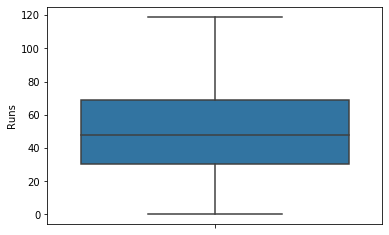

In [18]:
data.loc[data.Runs>120,'Runs']= np.nan
data.loc[data.Runs.isna(),'Runs'] = np.mean(data.Runs)
sns.boxplot(data=data,y="Runs")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

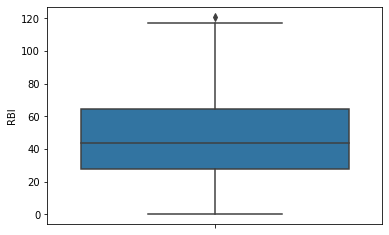

In [19]:
sns.boxplot(data=data,y="RBI")

In [20]:
values = data.iloc[data['RBI'].argsort()[-1:]]
values

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
141,Joe Carter,663,200,29.0,108.0,121,32,4,1447,404,...,210,222,68,A,E,241,8,6,A,250.0


### Se encontró 1 dato atípico en la variable RBI, el cual será cambiado por el promedio.

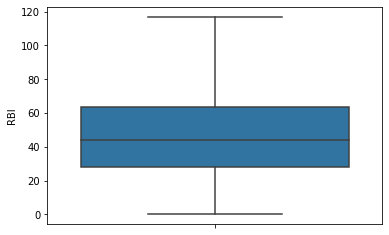

In [21]:
data.loc[data.RBI>120,'RBI']= np.nan
data.loc[data.RBI.isna(),'RBI'] = np.mean(data.RBI)
sns.boxplot(data=data,y="RBI")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

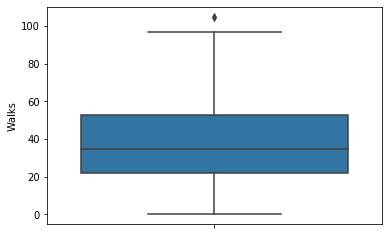

In [22]:
sns.boxplot(data=data,y="Walks")

In [23]:
values = data.iloc[data['Walks'].argsort()[-1:]]
values

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
313,Wade Boggs,580,207,8.0,107.0,71.0,105,5,2778,978,...,474,322,417,A,E,121,267,19,A,1600.0


### Se encontró 1 dato atípico en la variable Walks, el cual será cambiado por el promedio.

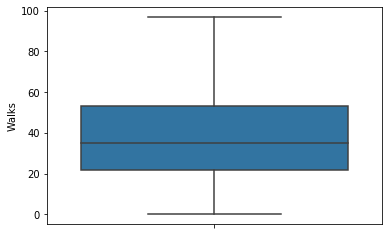

In [24]:
data.loc[data.Walks>100,'Walks']= np.nan
data.loc[data.Walks.isna(),'Walks'] = np.mean(data.Walks)
sns.boxplot(data=data,y="Walks")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

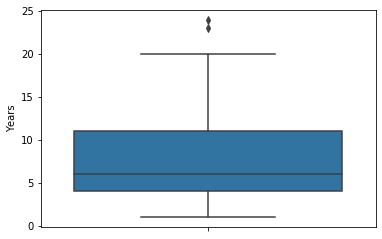

In [25]:
sns.boxplot(data=data,y="Years")

In [26]:
values = data.iloc[data['Years'].argsort()[-2:]]
values

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
302,Tony Perez,200,51,2.0,14.0,29.0,25.0,23,9778,2732,...,1272,1652,925,N,W,398,29,7,N,NaN
236,Pete Rose,237,52,0.0,15.0,25.0,30.0,24,14053,4256,...,2165,1314,1566,N,W,523,43,6,N,750.0


### Se encontró 2 datos atípicos en la variable Years. Serán cambiados por el promedio.

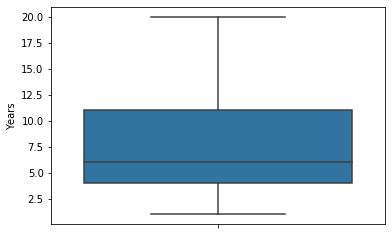

In [27]:
data.loc[data.Years>22,'Years']= np.nan
data.loc[data.Years.isna(),'Years'] = np.mean(data.Years)
sns.boxplot(data=data,y="Years")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

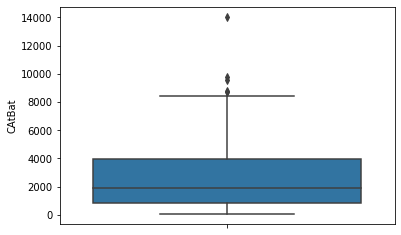

In [28]:
sns.boxplot(data=data,y="CAtBat")

In [29]:
values = data.iloc[data['CAtBat'].argsort()[-10:]]
values

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
73,Darrell Evans,507,122,29.0,78.0,85.0,91.0,18.00000,7761,1947,...,1175,1152,1380,A,E,808,108,2,A,535.000
16,Buddy Bell,568,158,20.0,89.0,75.0,73.0,15.00000,8068,2273,...,1045,993,732,N,W,105,290,10,N,775.000
70,Dave Concepcion,311,81,3.0,42.0,30.0,26.0,17.00000,8247,2198,...,950,909,690,N,W,153,223,10,N,320.000
306,Ted Simmons,127,32,4.0,14.0,25.0,12.0,19.00000,8396,2402,...,1048,1348,819,N,W,167,18,6,N,500.000
24,Bill Buckner,629,168,18.0,73.0,102.0,40.0,18.00000,8424,2464,...,1008,1072,402,A,E,1067,157,14,A,776.667
121,Graig Nettles,354,77,16.0,36.0,55.0,41.0,20.00000,8716,2172,...,1172,1267,1057,N,W,83,174,16,N,200.000
278,Steve Garvey,557,142,21.0,58.0,81.0,23.0,18.00000,8759,2583,...,1138,1299,478,N,W,1160,53,7,N,1450.000
249,Reggie Jackson,419,101,18.0,65.0,58.0,92.0,20.00000,9528,2510,...,1509,1659,1342,A,W,0,0,0,A,487.500
302,Tony Perez,200,51,2.0,14.0,29.0,25.0,7.34375,9778,2732,...,1272,1652,925,N,W,398,29,7,N,NaN
236,Pete Rose,237,52,0.0,15.0,25.0,30.0,7.34375,14053,4256,...,2165,1314,1566,N,W,523,43,6,N,750.000


### Se encontró 4 datos atípicos en la variable CAtBat. Serán cambiados por el promedio.

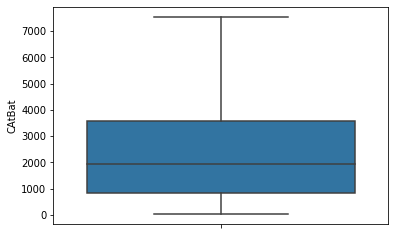

In [30]:
data.loc[data.CAtBat>7700,'CAtBat']= np.nan
data.loc[data.CAtBat.isna(),'CAtBat'] = np.mean(data.CAtBat)
sns.boxplot(data=data,y="CAtBat")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

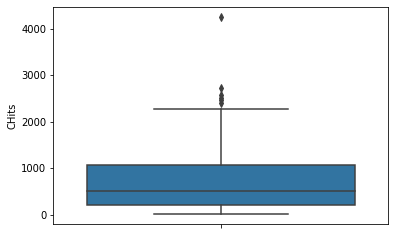

In [31]:
sns.boxplot(data=data,y="CHits")

### Se encontró 10 datos atípicos en la variable CHits. Serán cambiados por el promedio.

In [32]:
values = data.iloc[data['CHits'].argsort()[-8:]]
values

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
70,Dave Concepcion,311,81,3.0,42.0,30.0,26.0,17.00000,2439.570513,2198,...,950,909,690,N,W,153,223,10,N,320.000
16,Buddy Bell,568,158,20.0,89.0,75.0,73.0,15.00000,2439.570513,2273,...,1045,993,732,N,W,105,290,10,N,775.000
306,Ted Simmons,127,32,4.0,14.0,25.0,12.0,19.00000,2439.570513,2402,...,1048,1348,819,N,W,167,18,6,N,500.000
24,Bill Buckner,629,168,18.0,73.0,102.0,40.0,18.00000,2439.570513,2464,...,1008,1072,402,A,E,1067,157,14,A,776.667
249,Reggie Jackson,419,101,18.0,65.0,58.0,92.0,20.00000,2439.570513,2510,...,1509,1659,1342,A,W,0,0,0,A,487.500
278,Steve Garvey,557,142,21.0,58.0,81.0,23.0,18.00000,2439.570513,2583,...,1138,1299,478,N,W,1160,53,7,N,1450.000
302,Tony Perez,200,51,2.0,14.0,29.0,25.0,7.34375,2439.570513,2732,...,1272,1652,925,N,W,398,29,7,N,NaN
236,Pete Rose,237,52,0.0,15.0,25.0,30.0,7.34375,2439.570513,4256,...,2165,1314,1566,N,W,523,43,6,N,750.000


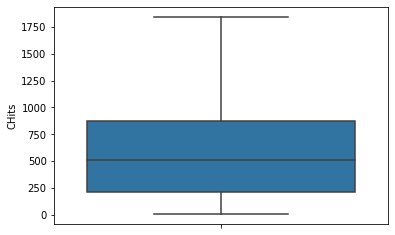

In [33]:
data.loc[data.CHits>1900,'CHits']= np.nan
data.loc[data.CHits.isna(),'CHits'] = np.mean(data.CHits)
sns.boxplot(data=data,y="CHits")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

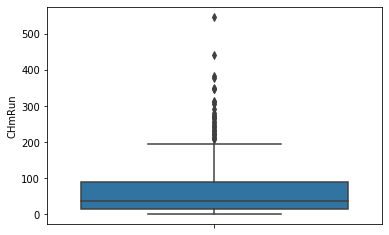

In [34]:
sns.boxplot(data=data,y="CHmRun")

### Se encontró varios datos atípicos en la variable CHmRun. Serán cambiados por el promedio.

In [35]:
values = data.iloc[data['CHmRun'].argsort()[-10:]]
values.CHmRun

96     305
243    312
65     315
73     347
114    348
163    351
302    379
121    384
80     442
249    548
Name: CHmRun, dtype: int64

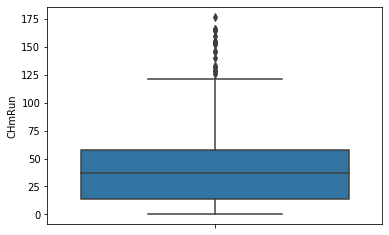

In [36]:
data.loc[data.CHmRun>180,'CHmRun']= np.nan
data.loc[data.CHmRun.isna(),'CHmRun'] = np.mean(data.CHmRun)
sns.boxplot(data=data,y="CHmRun")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

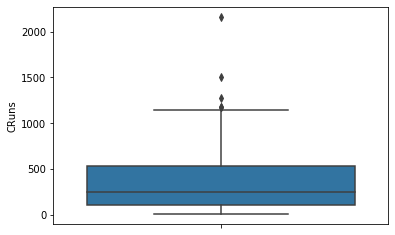

In [37]:
sns.boxplot(data=data,y="CRuns")

### Se encontró 3 datos atípicos en la variable CRuns. Serán cambiados por el promedio.

In [38]:
values = data.iloc[data['CRuns'].argsort()[-10:]]
values.CRuns

163    1104
292    1115
96     1135
278    1138
65     1141
121    1172
73     1175
302    1272
249    1509
236    2165
Name: CRuns, dtype: int64

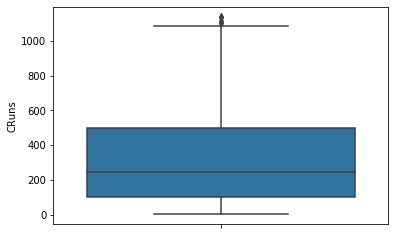

In [39]:
data.loc[data.CRuns>1140,'CRuns']= np.nan
data.loc[data.CRuns>1140,'CRuns'] = np.mean(data.CRuns)
sns.boxplot(data=data,y="CRuns")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

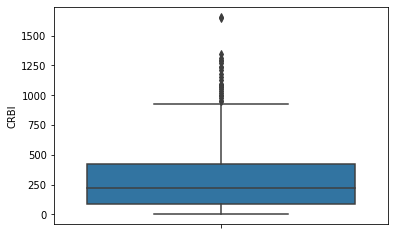

In [40]:
sns.boxplot(data=data,y="CRBI")

### Se encontró varios datos atípicos en la variable CAtBat. Serán cambiados por el promedio.

In [41]:
data.loc[data.CRBI>900]

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
16,Buddy Bell,568,158,20.000000,89.0,75.0,73.0,15.00000,2439.570513,589.912458,...,1045.0,993,732,N,W,105,290,10,N,775.000
24,Bill Buckner,629,168,18.000000,73.0,102.0,40.0,18.00000,2439.570513,589.912458,...,1008.0,1072,402,A,E,1067,157,14,A,776.667
38,Ben Oglivie,346,98,5.000000,31.0,53.0,30.0,16.00000,5913.000000,1615.000000,...,784.0,901,560,A,E,0,0,0,A,NaN
48,Cecil Cooper,542,140,12.000000,46.0,75.0,41.0,16.00000,7099.000000,589.912458,...,987.0,1089,431,A,E,697,61,9,A,NaN
50,Carlton Fisk,457,101,14.000000,42.0,63.0,22.0,17.00000,6521.000000,1767.000000,...,1003.0,977,619,A,W,389,39,4,A,875.000
65,Don Baylor,585,139,31.000000,93.0,94.0,62.0,17.00000,7546.000000,589.912458,...,NaN,1179,727,A,E,0,0,0,A,950.000
70,Dave Concepcion,311,81,3.000000,42.0,30.0,26.0,17.00000,2439.570513,589.912458,...,950.0,909,690,N,W,153,223,10,N,320.000
73,Darrell Evans,507,122,29.000000,78.0,85.0,91.0,18.00000,2439.570513,589.912458,...,NaN,1152,1380,A,E,808,108,2,A,535.000
74,Dwight Evans,529,137,26.000000,86.0,97.0,97.0,15.00000,6661.000000,1785.000000,...,1082.0,949,989,A,E,280,10,5,A,933.333
80,Dave Kingman,561,118,10.603125,70.0,94.0,33.0,16.00000,6677.000000,1575.000000,...,901.0,1210,608,A,W,463,32,8,A,NaN


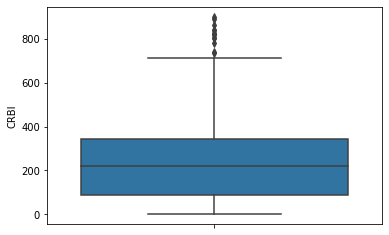

In [42]:
data.loc[data.CRBI>900,'CRBI'] = np.mean(data.CRBI)
sns.boxplot(data=data,y="CRBI")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

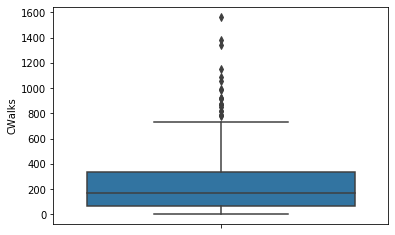

In [43]:
sns.boxplot(data=data,y="CWalks")

### Se encontró 4 datos atípicos en la variable CWalks. Serán cambiados por el promedio.

In [44]:
data.loc[data.CWalks>700]

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
9,Andre Thornton,401,92,17.0,49.000000,66.0,65.0,13.00000,5206.000000,1332.000000,...,784.0,890.000000,866,A,E,0,0,0,A,1100.000
16,Buddy Bell,568,158,20.0,89.000000,75.0,73.0,15.00000,2439.570513,589.912458,...,1045.0,330.118012,732,N,W,105,290,10,N,775.000
29,Brian Downing,513,137,20.0,90.000000,95.0,90.0,14.00000,5201.000000,1382.000000,...,763.0,734.000000,784,A,W,267,5,3,A,900.000
30,Bobby Grich,313,84,9.0,42.000000,30.0,39.0,17.00000,6890.000000,1833.000000,...,1033.0,864.000000,1087,A,W,127,221,7,A,NaN
61,Chris Speier,155,44,6.0,21.000000,23.0,15.0,16.00000,6631.000000,1634.000000,...,698.0,661.000000,777,N,E,53,88,3,N,275.000
65,Don Baylor,585,139,31.0,93.000000,94.0,62.0,17.00000,7546.000000,589.912458,...,NaN,330.118012,727,A,E,0,0,0,A,950.000
73,Darrell Evans,507,122,29.0,78.000000,85.0,91.0,18.00000,2439.570513,589.912458,...,NaN,330.118012,1380,A,E,808,108,2,A,535.000
74,Dwight Evans,529,137,26.0,86.000000,97.0,97.0,15.00000,6661.000000,1785.000000,...,1082.0,330.118012,989,A,E,280,10,5,A,933.333
81,Davey Lopes,255,70,7.0,49.000000,35.0,43.0,15.00000,6311.000000,1661.000000,...,1019.0,608.000000,820,N,E,51,54,8,N,450.000
88,Darrell Porter,155,41,12.0,21.000000,29.0,22.0,16.00000,5409.000000,1338.000000,...,746.0,805.000000,875,A,W,165,9,1,A,260.000


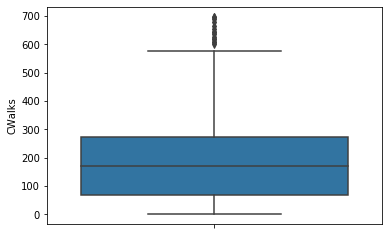

In [45]:
data.loc[data.CWalks>700,'CWalks'] = np.mean(data.CWalks)
sns.boxplot(data=data,y="CWalks")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

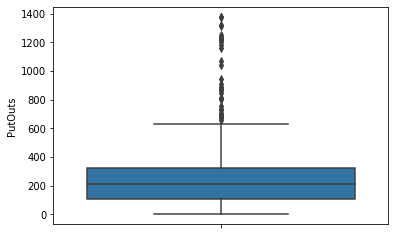

In [46]:
sns.boxplot(data=data,y="PutOuts")

### Se encontró varios datos atípicos en la variable PutOuts. Serán cambiados por el promedio.

In [47]:
data.loc[data.PutOuts>600]

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
1,Alan Ashby,315,81,7.0,24.0,38.0,39.0,14.0,3449.000000,835.000000,...,321.0,414.000000,375.00000,N,W,632,43,10,N,475.000
2,Alvin Davis,479,130,18.0,66.0,72.0,76.0,3.0,1624.000000,457.000000,...,224.0,266.000000,263.00000,A,W,880,82,14,A,480.000
4,Andres Galarraga,321,87,10.0,39.0,42.0,30.0,2.0,396.000000,101.000000,...,48.0,46.000000,33.00000,N,E,805,40,4,N,91.500
18,Bruce Bochte,407,104,6.0,57.0,43.0,65.0,12.0,5233.000000,1478.000000,...,643.0,658.000000,653.00000,A,W,912,88,9,A,NaN
22,Bob Boone,22,10,1.0,4.0,2.0,1.0,6.0,84.000000,26.000000,...,9.0,9.000000,3.00000,A,W,812,84,11,A,NaN
24,Bill Buckner,629,168,18.0,73.0,102.0,40.0,18.0,2439.570513,589.912458,...,1008.0,330.118012,402.00000,A,E,1067,157,14,A,776.667
27,Bo Diaz,474,129,10.0,50.0,56.0,40.0,10.0,2331.000000,604.000000,...,246.0,327.000000,166.00000,N,W,732,83,13,N,750.000
32,Bob Horner,517,141,27.0,70.0,87.0,52.0,9.0,3571.000000,994.000000,...,545.0,652.000000,337.00000,N,W,1378,102,8,N,NaN
48,Cecil Cooper,542,140,12.0,46.0,75.0,41.0,16.0,7099.000000,589.912458,...,987.0,330.118012,431.00000,A,E,697,61,9,A,NaN
73,Darrell Evans,507,122,29.0,78.0,85.0,91.0,18.0,2439.570513,589.912458,...,NaN,330.118012,260.23913,A,E,808,108,2,A,535.000


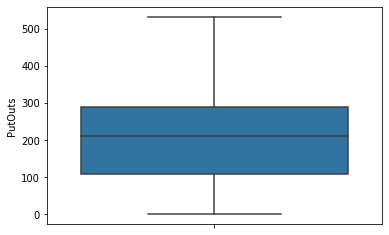

In [48]:
data.loc[data.PutOuts>600,'PutOuts'] = np.mean(data.PutOuts)
sns.boxplot(data=data,y="PutOuts")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

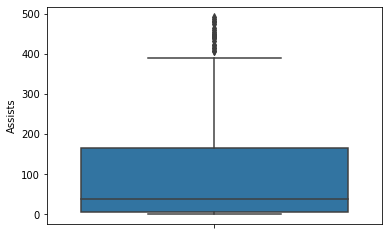

In [49]:
sns.boxplot(data=data,y="Assists")

### Se encontró varios datos atípicos en la variable Assists. Serán cambiados por el promedio.

In [50]:
data.loc[data.Assists>390]

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
5,Alfredo Griffin,594,169,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,...,501.0,336.0,194.0,A,W,282.0,421,25,A,750.000
10,Alan Trammell,574,159,21.0,107.0,75.0,59.0,10.0,4631.0,1300.0,...,702.0,504.0,488.0,A,E,238.0,445,22,A,517.143
59,Cal Ripken,627,177,25.0,98.0,81.0,70.0,6.0,3210.0,927.0,...,529.0,472.0,313.0,A,E,240.0,482,13,A,1350.000
107,Frank White,566,154,22.0,76.0,84.0,43.0,14.0,6100.0,1583.0,...,743.0,693.0,300.0,A,W,316.0,439,10,A,750.000
118,Glenn Hubbard,408,94,4.0,42.0,36.0,66.0,9.0,3573.0,866.0,...,429.0,365.0,410.0,N,W,282.0,487,19,N,535.000
133,Harold Reynolds,445,99,1.0,46.0,24.0,29.0,4.0,618.0,129.0,...,72.0,31.0,48.0,A,W,278.0,415,16,A,87.500
161,Johnny Ray,579,174,7.0,67.0,78.0,58.0,6.0,3053.0,880.0,...,366.0,337.0,218.0,N,E,280.0,479,5,N,657.000
166,Juan Samuel,591,157,16.0,90.0,78.0,26.0,4.0,2020.0,541.0,...,310.0,226.0,91.0,N,E,290.0,440,25,N,640.000
172,Jose Uribe,453,101,3.0,46.0,43.0,61.0,3.0,948.0,218.0,...,96.0,72.0,91.0,N,W,249.0,444,16,N,195.000
200,Lou Whitaker,584,157,20.0,95.0,73.0,63.0,10.0,4704.0,1320.0,...,724.0,522.0,576.0,A,E,276.0,421,11,A,420.000


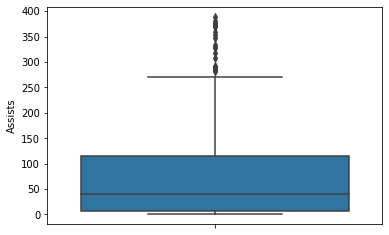

In [51]:
data.loc[data.Assists>390,'Assists'] = np.mean(data.Assists)
sns.boxplot(data=data,y="Assists")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

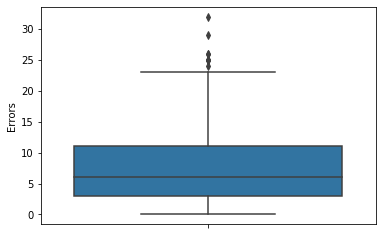

In [52]:
sns.boxplot(data=data,y="Errors")

### Se encontró 4 datos atípicos en la variable CAtBat. Serán cambiados por el promedio.

In [53]:
data.loc[data.Errors>20]

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
5,Alfredo Griffin,594,169,4.0,74.0,51.0,35.0,11.0,4408.0,1133.000000,...,501.0,336.0,194.0,A,W,282.0,106.913043,25,A,750.000
10,Alan Trammell,574,159,21.0,107.0,75.0,59.0,10.0,4631.0,1300.000000,...,702.0,504.0,488.0,A,E,238.0,106.913043,22,A,517.143
33,Brook Jacoby,583,168,17.0,83.0,80.0,56.0,5.0,1646.0,452.000000,...,219.0,208.0,136.0,A,E,109.0,292.000000,25,A,612.500
35,Bill Madlock,379,106,10.0,38.0,60.0,30.0,14.0,6207.0,589.912458,...,859.0,803.0,571.0,N,W,72.0,170.000000,24,N,850.000
68,Darnell Coles,521,142,20.0,67.0,86.0,45.0,4.0,815.0,205.000000,...,99.0,103.0,78.0,A,E,107.0,242.000000,23,A,105.000
92,Dale Sveum,317,78,7.0,35.0,35.0,32.0,1.0,317.0,78.000000,...,35.0,35.0,32.0,A,E,45.0,122.000000,26,A,70.000
115,Gary Gaetti,596,171,34.0,91.0,108.0,52.0,6.0,2862.0,728.000000,...,361.0,401.0,224.0,A,W,118.0,334.000000,21,A,900.000
116,Greg Gagne,472,118,12.0,63.0,54.0,30.0,4.0,793.0,187.000000,...,102.0,80.0,50.0,A,W,228.0,377.000000,26,A,155.000
166,Juan Samuel,591,157,16.0,90.0,78.0,26.0,4.0,2020.0,541.000000,...,310.0,226.0,91.0,N,E,290.0,106.913043,25,N,640.000
206,Mariano Duncan,407,93,8.0,47.0,30.0,30.0,2.0,969.0,230.000000,...,121.0,69.0,68.0,N,W,172.0,317.000000,25,N,150.000


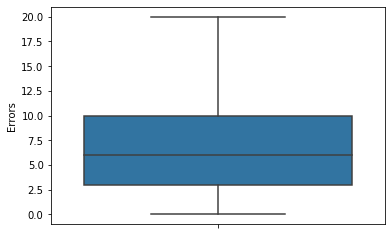

In [54]:
data.loc[data.Errors>20,'Errors'] = np.mean(data.Errors)
sns.boxplot(data=data,y="Errors")

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

//------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------//

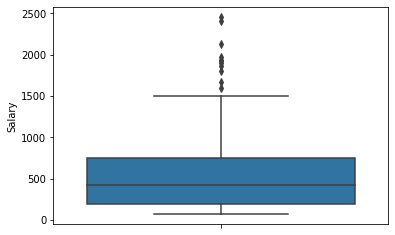

In [55]:
sns.boxplot(data=data,y="Salary")

### Se encontró 4 datos atípicos en la variable CAtBat. Serán cambiados por el promedio.

In [56]:
data.loc[data.Salary>1500]

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
82,Don Mattingly,677,238,31.0,117.000000,113.0,53.000000,5.0,2223.0,737.000000,...,349.0,401.000000,171.00000,A,E,288.937888,100.000000,6.0,A,1975.000
84,Dale Murphy,614,163,29.0,89.000000,83.0,75.000000,11.0,5017.0,1388.000000,...,813.0,822.000000,617.00000,N,W,303.000000,6.000000,6.0,N,1900.000
96,Dave Winfield,565,148,24.0,90.000000,104.0,77.000000,14.0,7287.0,589.912458,...,1135.0,330.118012,260.23913,A,E,292.000000,9.000000,5.0,A,1861.460
100,Eddie Murray,495,151,17.0,61.000000,84.0,78.000000,10.0,5624.0,1679.000000,...,884.0,330.118012,260.23913,A,E,288.937888,88.000000,13.0,A,2460.000
112,Gary Carter,490,125,24.0,81.000000,105.0,62.000000,13.0,6063.0,1646.000000,...,847.0,330.118012,680.00000,N,E,288.937888,62.000000,8.0,N,1925.571
163,Jim Rice,618,200,20.0,98.000000,110.0,62.000000,13.0,7127.0,589.912458,...,1104.0,330.118012,564.00000,A,E,330.000000,16.000000,8.0,A,2412.500
179,Keith Hernandez,551,171,13.0,94.000000,83.0,94.000000,13.0,6090.0,1840.000000,...,969.0,900.000000,260.23913,N,E,288.937888,149.000000,5.0,N,1800.000
217,Mike Schmidt,20,1,0.0,0.000000,0.0,0.000000,2.0,41.0,9.000000,...,6.0,7.000000,4.00000,N,E,78.000000,220.000000,6.0,N,2127.333
229,Ozzie Smith,514,144,0.0,67.000000,54.0,79.000000,9.0,4739.0,1169.000000,...,583.0,374.000000,528.00000,N,E,229.000000,106.913043,15.0,N,1940.000
248,Rickey Henderson,608,160,28.0,50.663551,74.0,89.000000,8.0,4071.0,1182.000000,...,862.0,417.000000,260.23913,A,E,426.000000,4.000000,6.0,A,1670.000


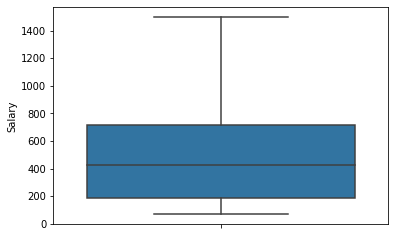

In [57]:
data.loc[data.Salary>1500,'Salary'] = np.mean(data.Salary)
sns.boxplot(data=data,y="Salary")

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Player       322 non-null object
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null float64
Runs         322 non-null float64
RBI          322 non-null float64
Walks        322 non-null float64
Years        322 non-null float64
CAtBat       322 non-null float64
CHits        322 non-null float64
CHmRun       322 non-null float64
CRuns        316 non-null float64
CRBI         322 non-null float64
CWalks       322 non-null float64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null float64
Assists      322 non-null float64
Errors       322 non-null float64
NewLeague    322 non-null object
Salary       263 non-null float64
dtypes: float64(15), int64(2), object(4)
memory usage: 52.9+ KB


# Modelo predictivo preliminar 

In [59]:
indep_vars_rl = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI','Walks','Years','CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI','CWalks','PutOuts','Assists','Errors']
dep_vars_rl = ['Salary']

Para poder realizar el modelo de regresión, el modelo no puede contar con valores nulos en el dataset. Por ende se apartan los valores nan en la variable Salary.

In [60]:
dataNanSalary =  data[data.Salary.isna()]
dataSinNanSalary = data[~data.Salary.isna()]

In [61]:
dataSinNanSalary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Player       263 non-null object
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null float64
Runs         263 non-null float64
RBI          263 non-null float64
Walks        263 non-null float64
Years        263 non-null float64
CAtBat       263 non-null float64
CHits        263 non-null float64
CHmRun       263 non-null float64
CRuns        258 non-null float64
CRBI         263 non-null float64
CWalks       263 non-null float64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null float64
Assists      263 non-null float64
Errors       263 non-null float64
NewLeague    263 non-null object
Salary       263 non-null float64
dtypes: float64(15), int64(2), object(4)
memory usage: 45.2+ KB


In [62]:
indep_data_rl = dataSinNanSalary[indep_vars_rl]
dep_data_rl = dataSinNanSalary[dep_vars_rl]

In [63]:
train_x, test_x, train_y, test_y = train_test_split(indep_data_rl, dep_data_rl, test_size=0.30, random_state=12345)

In [64]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(184, 16)
(184, 1)
(79, 16)
(79, 1)


In [65]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
for var, coef in zip(indep_vars_rl, np.squeeze(regr.coef_)):
    print("{}: {}".format(var, coef))
print("intercepción: {}".format(np.squeeze(regr.intercept_)))

In [ ]:
train_y_pred = regr.predict(train_x)
test_y_pred = regr.predict(test_x)
print(train_y_pred.shape)
print(test_y_pred.shape)

In [ ]:
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))

In [ ]:
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_x.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_x.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

In [ ]:
# Calculamos la matriz de correlaciones
corr = train_x.join(train_y).corr()
corr

In [ ]:
## Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})